In [14]:
## General Imports
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
training_values = "~/Coding/drivendata/pump-it-up/data/raw/TrainingSetValues.csv"
training_labels = "~/Coding/drivendata/pump-it-up/data/raw/TrainingSetLabels.csv"
vals = pd.read_csv(training_values)
labels = pd.read_csv(training_labels)

df = pd.merge(
    left=vals,
    right=labels,
    on='id'
)

In [4]:
# report = ProfileReport(df, title='PumpItUp_EDA')
# report.to_file('~/Coding/drivendata/pump-it-up/reports/raw_data_EDA.html')

In [5]:
df.sample(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
44744,55492,0.0,2011-04-01,Water,0,Commu,35.754094,-6.326838,Kwa Norman Mombo,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional needs repair
32188,17023,0.0,2011-04-04,Government Of Tanzania,0,DWE,33.436036,-8.749639,Rabison Mwakanandala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
48266,24000,1000.0,2011-03-22,Go,0,DW,37.179883,-6.037763,Amani,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
37859,18794,0.0,2011-02-19,Sao H,1858,Sao,35.215674,-8.410828,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
43810,73916,0.0,2013-03-27,Government Of Tanzania,1658,DWE,36.587151,-3.259026,Ololikoti,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5201,68848,0.0,2011-04-08,NaN,0,NaN,33.487774,-9.527874,Kwa Akina Debo,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
18614,29166,0.0,2013-03-15,Tcrs,1334,DWE,36.720754,-2.629749,Kwa Sarune,0,...,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
54186,37654,0.0,2012-10-25,Ministry Of Water,1214,Wizara ya maji,33.891808,-1.252452,Kwa Machagi Mgika,0,...,soft,good,enough,enough,lake,river/lake,surface,communal standpipe multiple,communal standpipe,non functional
38170,36180,0.0,2011-03-19,Dhv,169,DWE,37.674107,-7.416610,Kwa Charle,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
12910,53197,0.0,2011-02-27,Plan Int,192,Plan Tanzania,38.938740,-6.941787,Kifuru Primary School,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,non functional


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [23]:
# percentage of missing values
nulls = df.isnull().mean() * 100
nulls[nulls>0]

funder                6.122896
installer             6.153199
wpt_name              0.003367
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.528620
scheme_name          48.501684
permit                5.144781
dtype: float64

<Axes: >

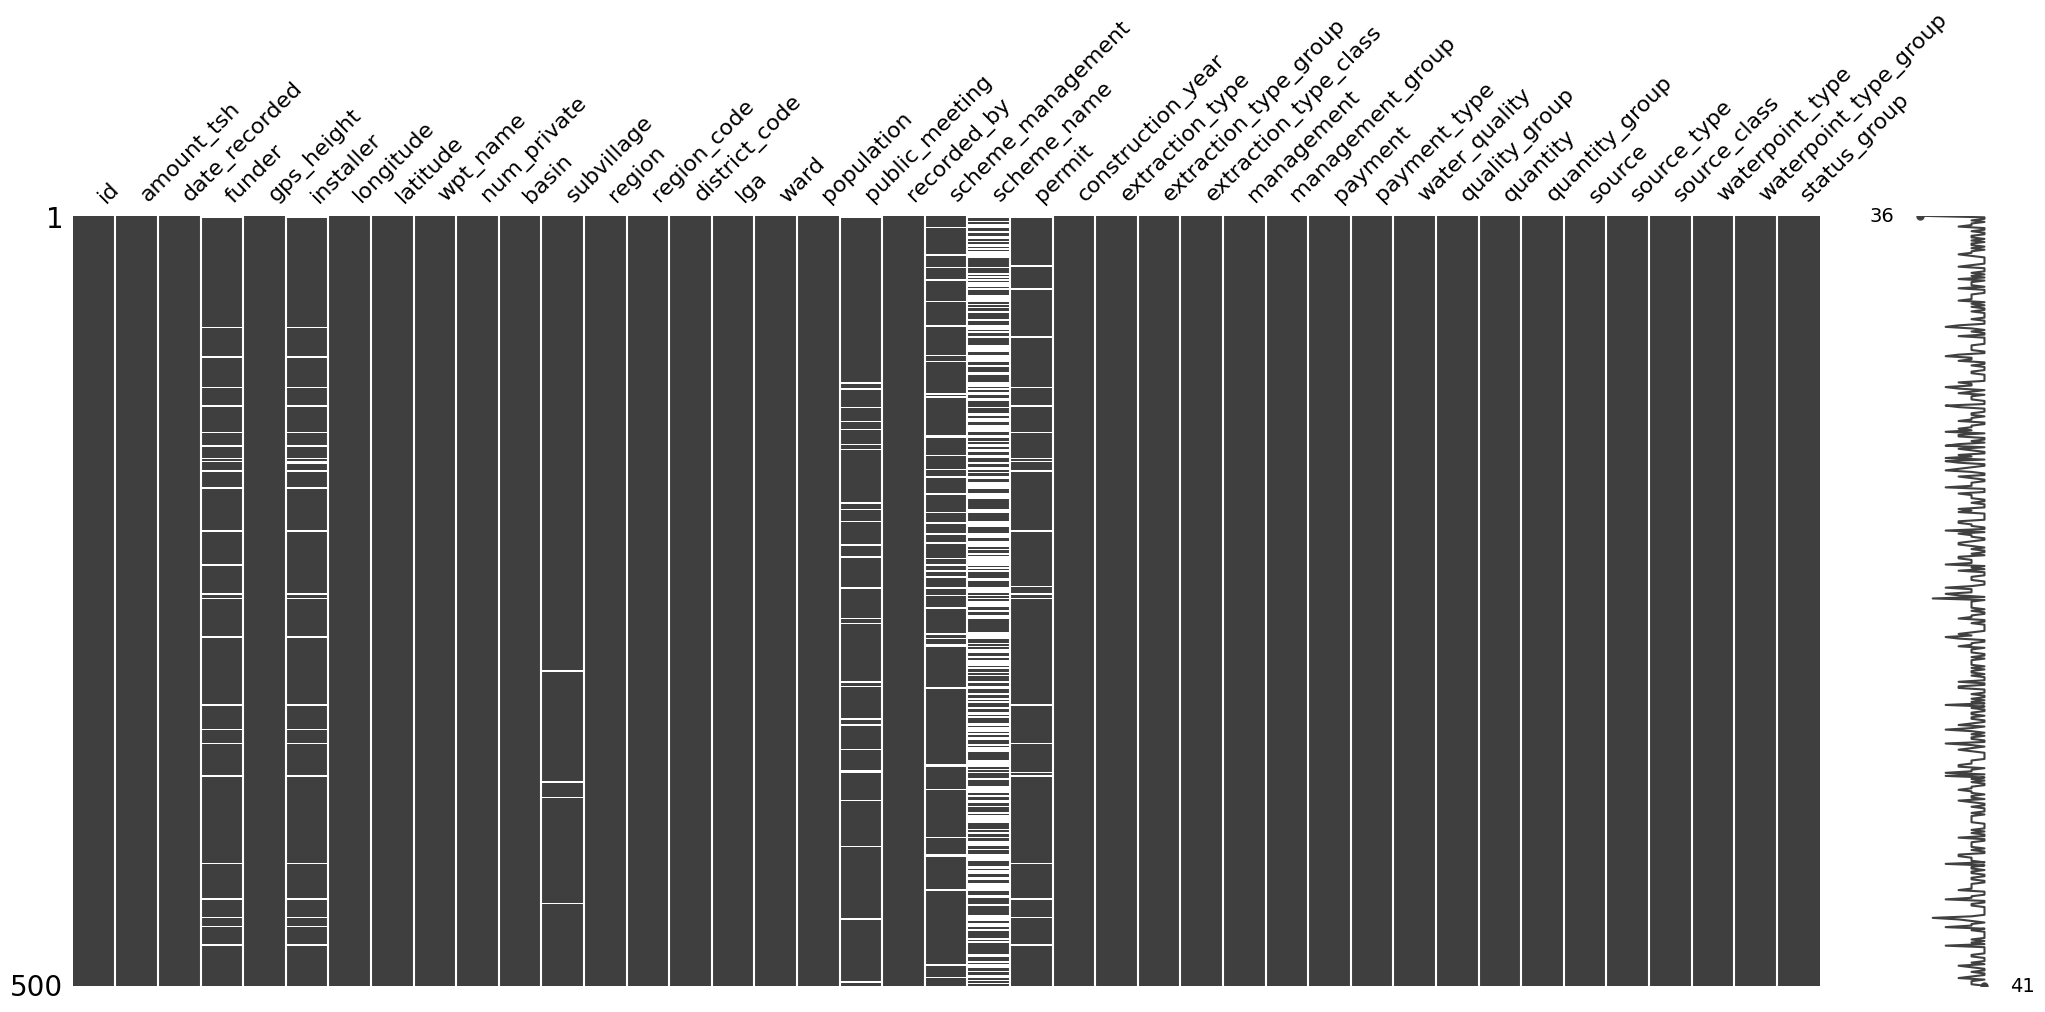

In [19]:
# ax = msno.matrix(df.sample(500))
# ax.get_figure()
msno.matrix(df.sample(500))

In [6]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Comments:

- Fields 'funder' and 'installer' are almost always missing at the same time.
- No other clear patterns in missing values.
- Almost 50% of records have missing values for 'scheme_name'.

# Numeric values
Let's have a closer look at the numeric columns (excluding "longitude", "latitude", "district_code", which do not provide essential information):

1. all numeric columns have no null data.
2. "id": all unique values, so each row corresponds to a specific water point.
3. "amount_tsh": varies from 0 to 350000. This is erroneously indicated in the competition as Total Static Head, but from the Taarifa repository (schemas.py) it's evident that this is the cost of the scheme in Tanzanian Shillings (TSH).
4. "gps_height": varies from -90 to 2770 masl.
5. "num_private": number of private connections. Only 1.27% of the water points have private connections. Instead of using the actual number of private connections it might be more useful to have a boolean.
6. "population": almost 48% of the records report a population of 0 or 1, which is probably wrong. The majority of the points have a population between 100 and 500.
7. "construction_year": about 35% of the records have 0 as construction year, which I assume is to be intended as a null value instead. The oldest water point is from year 1960, the newest is from year 2013.

In [7]:
# 1. df statistics
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
# 2. Check if there are duplicate "id"
# df.id.nunique()
df.id.duplicated().any()

False

In [9]:
# 3. Making sense of the "amount_tsh"
display(df.amount_tsh.describe())
df.amount_tsh.value_counts(sort=False, bins=12)

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

(-350.001, 29166.667]       59359
(29166.667, 58333.333]         23
(58333.333, 87500.0]            2
(87500.0, 116666.667]           3
(116666.667, 145833.333]        9
(145833.333, 175000.0]          1
(175000.0, 204166.667]          1
(204166.667, 233333.333]        0
(233333.333, 262500.0]          1
(262500.0, 291666.667]          0
(291666.667, 320833.333]        0
(320833.333, 350000.0]          1
Name: count, dtype: int64

In [10]:
# 4. Altitude in masl
df.gps_height.describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [11]:
# 5. Number of private connections
display(df.num_private.describe())
display(df.num_private.value_counts(sort=False, bins=10))
num_private_gt_0 = df[df.num_private>0]['num_private'].count()
print(f'# water points with private connections: {num_private_gt_0}, i.e. {(num_private_gt_0/len(df.num_private))*100:.2f}%')

count    59400.000000
mean         0.474141
std         12.236230
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64

(-1.777, 177.6]     59388
(177.6, 355.2]          5
(355.2, 532.8]          1
(532.8, 710.4]          3
(710.4, 888.0]          1
(888.0, 1065.6]         0
(1065.6, 1243.2]        0
(1243.2, 1420.8]        1
(1420.8, 1598.4]        0
(1598.4, 1776.0]        1
Name: count, dtype: int64

# water points with private connections: 757, i.e. 1.27%


In [12]:
# 6. Population served by the water point
display(df.population.describe())
display(df.population.value_counts(sort=False, bins=10))
pop_gt_500 = df[df.population>500]['population'].count()
print(f'# water points with pop > 500: {pop_gt_500}, i.e. {(pop_gt_500/len(df.population))*100:.2f}%')

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

(-30.501, 3050.0]     59153
(3050.0, 6100.0]        179
(6100.0, 9150.0]         60
(9150.0, 12200.0]         6
(12200.0, 15250.0]        0
(15250.0, 18300.0]        1
(18300.0, 21350.0]        0
(21350.0, 24400.0]        0
(24400.0, 27450.0]        0
(27450.0, 30500.0]        1
Name: count, dtype: int64

# water points with pop > 500: 4628, i.e. 7.79%


In [13]:
pop_df = df[['id','population']]
max_pop = pop_df.population.max()
pop_df['pop_bins'] = pd.cut(pop_df.population, bins=[0, 1,100,500, max_pop], labels=['0-1', '1-100', '100-500', '>500'], include_lowest=True)

pop_df.sample(10)

,id,population,pop_bins
40522,32865,150,100-500
37941,63909,0,0-1
18813,63336,40,1-100
56960,14181,120,100-500
39954,20690,150,100-500
32495,34622,1,0-1
20423,3717,1,0-1
22152,28328,0,0-1
21377,27949,0,0-1
29314,65375,10,1-100


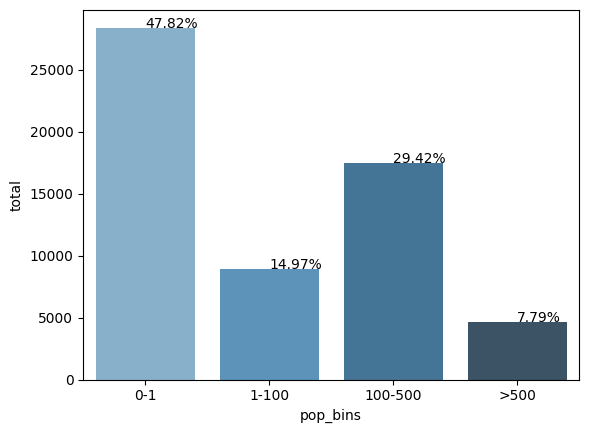

In [14]:
grouped = pop_df.groupby('pop_bins').agg({'id':'count'}).reset_index().rename(columns={'id':'total'})
ax = sns.barplot(
    x=grouped.pop_bins,
    y=grouped.total,
    palette='Blues_d',   
)

for index,row in grouped.iterrows():
    pcg = f'{row.total/len(df)*100:.2f}%'
    ax.text(row.pop_bins, row.total, pcg)
plt.show()

In [15]:
# 7. Year of construction
display(df.construction_year.describe())
min_yr = df[df.construction_year>0]['construction_year'].min()
max_yr = df[df.construction_year>0]['construction_year'].max()
constr_yr_0 = df[df.construction_year == 0]['construction_year'].count()
print(f'# water points with null construction year: {constr_yr_0}, i.e. {(constr_yr_0/len(df.construction_year))*100:.2f}%')
print(f'oldest water point constructed in year {min_yr}\nnewest water point constructed in year {max_yr}')

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

# water points with null construction year: 20709, i.e. 34.86%
oldest water point constructed in year 1960
newest water point constructed in year 2013


# Categorical values

Let's have a closer look at the categorical columns (excluding "funder", "wpt_name", "subvillage", "lga", "ward", "scheme_name", which are not relevant for the analysis):

1. "date_recorded": readings have been taken between 14-Oct-2002 and 03-Dec-2013. Measurement can be affected by the seasonality of the water resource, therefore I will create an additional column for the rainy season: 0 is dry season, 1 is short rainy season and 2 is long rainy season.
2. "installer": there are more than 2000 different implementers, with many mispelling referring to the same thing (unclean data). However, many values include almost the acronym DWE (District Water Engineer), and others the word government both as local (I assume, when no name is specified) and as foreign.
3. "basin": there are 9 different hydrological basins.
4. "region/region_code": there are 21 different regions and 27 different region codes: some of the regions have different codes.
5. "public_meeting": almost 86% of the records have public meetings, 6% is unknown.
6. "recorded_by": there is only one unique entity in this field, so this is not a useful information.
7. "scheme_management/management/management_group": according to the 'scheme_management' field almost 62% of the schemes are managed via VWC (Village Water Committee). There is some discrepency between the 'scheme_management' and the 'management' fields, which apparantly should report the same type of information, but there are null values in 'scheme_management' column. The 'management_group' seems like a better summary for this information.
8. "permit": about 64% of schemes have a permit.
9. "extraction_type/group/class": subcategories of type of pumps installed. The 'gravity' type I assume is for river/spring sources. The 'extraction_type_class' is the best summary.
10. "payment/payment_type": these two columns report the same information.
11. "water_quality/group": similar information, but in the 'water_quality' field there are two categories where implicity says the water point was abandoned: about 51% of the points that were abandoned are still functional.
12. "quantity/group": these two fields provide the same information.
13. "source/class/type": provide similar information, the best summary represented by the type.
14. "waterpoint_type/group": similar information, the best summary represented by the group.

In [16]:
df.select_dtypes(include='object').columns.to_list()

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [17]:
# 1. Date recorded --> add year and month and check seasonality
# making a backup copy of the original dataframe
df_orig = df.copy()
df['date_recorded'] = pd.to_datetime(df.date_recorded, format='%Y-%m-%d')

In [18]:
df.date_recorded.describe()

count                            59400
mean     2012-03-29 09:11:33.818181888
min                2002-10-14 00:00:00
25%                2011-04-01 00:00:00
50%                2012-10-10 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [20]:
# 2. Installer
print(f'Number of unique values: {df.installer.nunique()}\nnumber of null records: {df.installer.isnull().sum()}')
display(df.installer.value_counts())
# pcg_DWE = df[df.installer == 'DWE']['installer'].count()/len(df)*100
# pcg_government = df[df.installer == 'Government']['installer'].count()/len(df)*100
# print(f'{pcg_DWE:.2f}% of points were installed by DWE, {pcg_government:.2f}% by the government and the remaining by other actors')

Number of unique values: 2145
number of null records: 3655


installer
DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: count, Length: 2145, dtype: int64

Number of null records: 0


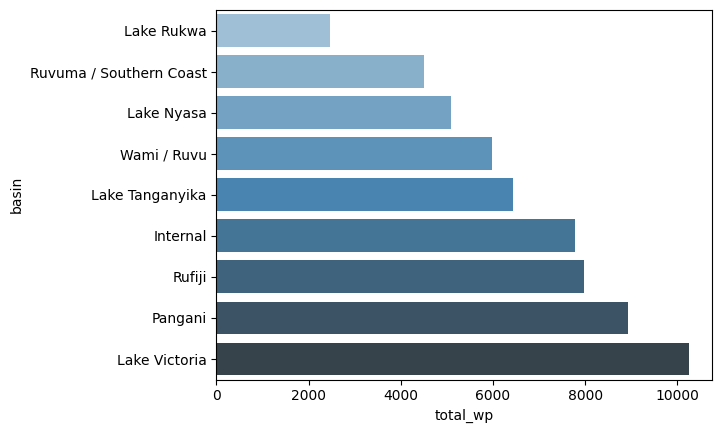

In [21]:
# 3. Basin
# df.basin.value_counts()
print(f'Number of null records: {df.basin.isnull().sum()}')
grouped = df.groupby(['basin']).agg({'id':'count'}).reset_index().rename(columns={'id':'total_wp'}).sort_values('total_wp')

sns.barplot(
    data=grouped,
    x='total_wp',
    y='basin',
    palette='Blues_d',
)

plt.show()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

region_code
11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: count, dtype: int64

Number of null records (region): 0
number of null records (region_code): 0


,region_code,total_wp,region
22,40,1,Pwani
7,8,300,Lindi
21,24,326,Arusha
8,9,390,Mtwara
26,99,423,Mtwara
6,7,805,Dar es Salaam
25,90,917,Mtwara
23,60,1025,Pwani
24,80,1238,Lindi
20,21,1583,Manyara


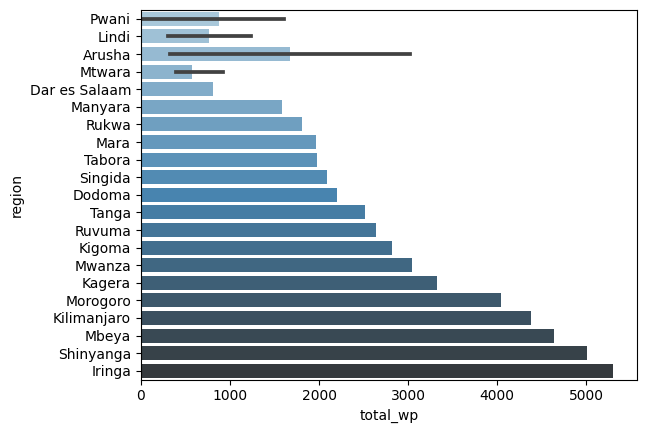

In [24]:
# 4. Region
display(df.region.value_counts())
display(df.region_code.value_counts())
print(f'Number of null records (region): {df.region.isnull().sum()}\nnumber of null records (region_code): {df.region_code.isnull().sum()}')

grouped = df.groupby(['region_code']).agg({'id':'count', 'region':'last'}).reset_index().rename(columns={'id':'total_wp'}).sort_values('total_wp')

display(grouped)

sns.barplot(
    data=grouped,
    x='total_wp',
    y='region',
    palette='Blues_d',
)

plt.show()

In [23]:
# 5. Public meeting
display(df.public_meeting.value_counts())
print(f'Number of null records: {df.public_meeting.isnull().sum()}')
pcg_public_meeting = df[df.public_meeting == True]['id'].count()/len(df.id)*100
print(f'{pcg_public_meeting:.2f}% of water points have public meeting, the remaining have no meetings or unknown.')

public_meeting
True     51011
False     5055
Name: count, dtype: int64

Number of null records: 3334
85.88% of water points have public meeting, the remaining have no meetings or unknown.


In [24]:
# 6. Recoded by
display(df.recorded_by.value_counts())
print(f'Number of null records: {df.recorded_by.isnull().sum()}')

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

Number of null records: 0


scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

Number of null records (scheme_management): 3878
Number of null records (management): 0
Number of null records (management_group): 0


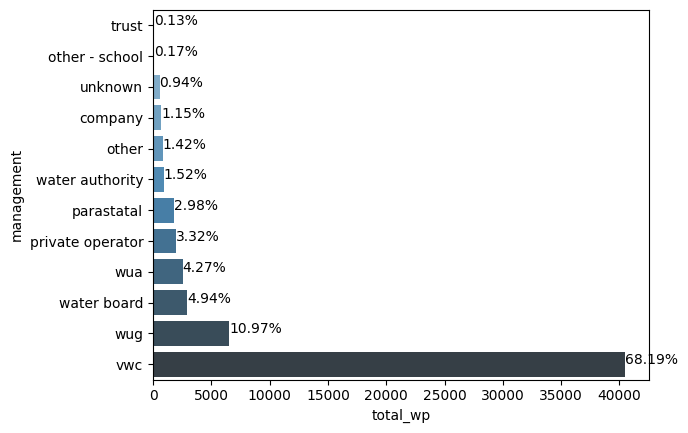

In [25]:
# 7. Scheme management
display(df.scheme_management.value_counts())
display(df.management.value_counts())
display(df.management_group.value_counts())

print(f'Number of null records (scheme_management): {df.scheme_management.isnull().sum()}')
print(f'Number of null records (management): {df.management.isnull().sum()}')
print(f'Number of null records (management_group): {df.management_group.isnull().sum()}')

grouped = df.groupby(['management']).agg({'id':'count'}).reset_index().rename(columns={'id':'total_wp'}).sort_values('total_wp')

ax = sns.barplot(
    data=grouped,
    x='total_wp',
    y='management',
    palette='Blues_d',
)

for index,row in grouped.iterrows():
    pcg = f'{row.total_wp/len(df)*100:.2f}%'
    ax.text(row.total_wp, row.management, pcg)

plt.show()

In [26]:
# 8. Permit
display(df.permit.value_counts())
print(f'Number of null records: {df.permit.isnull().sum()}')
pcg_permit = df[df.permit == True]['id'].count()/len(df.id)*100
print(f'{pcg_permit:.2f}% of water points have permit, the remaning either have no permit or the permit status is unknown.')

permit
True     38852
False    17492
Name: count, dtype: int64

Number of null records: 3056
65.41% of water points have permit, the remaning either have no permit or the permit status is unknown.


In [27]:
# 9. Extraction type
display(df.extraction_type.value_counts())
display(df.extraction_type_group.value_counts())
display(df.extraction_type_class.value_counts())

print(f'Number of null records (extraction_type): {df.extraction_type.isnull().sum()}')
print(f'Number of null records (extraction_type_group): {df.extraction_type_group.isnull().sum()}')
print(f'Number of null records (extraction_type_class): {df.extraction_type_class.isnull().sum()}')

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

Number of null records (extraction_type): 0
Number of null records (extraction_type_group): 0
Number of null records (extraction_type_class): 0


In [28]:
# 10. Payment
display(df.payment.value_counts())
display(df.payment_type.value_counts())

print(f'Number of null records (payment): {df.payment.isnull().sum()}')
print(f'Number of null records (payment_type): {df.payment_type.isnull().sum()}')

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

Number of null records (payment): 0
Number of null records (payment_type): 0


In [29]:
# 11. Water quality
display(df.water_quality.value_counts())
display(df.quality_group.value_counts())

print(f'Number of null records (water_quality): {df.water_quality.isnull().sum()}')
print(f'Number of null records (quality_group): {df.quality_group.isnull().sum()}')

tmp = df[df.water_quality.str.contains('abandoned')][['status_group']]
pcg_functional_abandoned = tmp[tmp.status_group == 'functional']['status_group'].count()/len(tmp)
print(f'{pcg_functional_abandoned*100:.2f}% of the points that were abandoned for bad quality, are still functional.')

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

Number of null records (water_quality): 0
Number of null records (quality_group): 0
50.56% of the points that were abandoned for bad quality, are still functional.


In [30]:
# 12. Water quantity
display(df.quantity.value_counts())
display(df.quantity_group.value_counts())

print(f'Number of null records (quantity): {df.quantity.isnull().sum()}')
print(f'Number of null records (quantity_group): {df.quantity_group.isnull().sum()}')

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

Number of null records (quantity): 0
Number of null records (quantity_group): 0


In [31]:
# 13. Source
display(df.source.value_counts())
display(df.source_class.value_counts())
display(df.source_type.value_counts())

print(f'Number of null records (source): {df.source.isnull().sum()}')
print(f'Number of null records (source_class): {df.source_class.isnull().sum()}')
print(f'Number of null records (source_type): {df.source_type.isnull().sum()}')

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

source_class
groundwater    45794
surface        13328
unknown          278
Name: count, dtype: int64

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

Number of null records (source): 0
Number of null records (source_class): 0
Number of null records (source_type): 0


In [32]:
# 14. Water point type
display(df.waterpoint_type.value_counts())
display(df.waterpoint_type_group.value_counts())

print(f'Number of null records (waterpoint_type): {df.waterpoint_type.isnull().sum()}')
print(f'Number of null records (waterpoint_type_group): {df.waterpoint_type_group.isnull().sum()}')

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

Number of null records (waterpoint_type): 0
Number of null records (waterpoint_type_group): 0
